<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/3_1_Statistics_Taxi_comparison_of_Economy_and_Comfort_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Используйте датасет [FPS_hw_x_df_x_taxi.xlsx](https://docs.google.com/spreadsheets/d/1MnLLAxQJ4IzXBHf7Dj4nE2BS6wd-qz0S?rtpof=true&usp=drive_fs).

*   Исследуйте данные и постройте графики плотности распределения дистанций поездок для классов Economy и Comfort.
*   Проверьте гипотезу: «На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе».
*   Сделайте выводы по результатам проверки. Для определения предпочтений понадобится изучение описательных статистик и графиков по классам.

Примечание: гипотезы всегда формулируются однозначно, поскольку не уточняется конкретное значение дистанций, а просто сказано “дальние” и нет уточнений по статусу поездки, необходимо исследовать общее распределение.

In [ ]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt


Загружаем файл с данными и проверяем его

In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


# Просмотр описательной статистики по датасету

In [ ]:
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,21.520472,26.275849,0.587000
std,270556.211847,2.007256,4.355491,18.876337,0.492496
min,412.000000,1.000000,14.899553,0.024259,0.000000
25%,227126.500000,2.000000,18.466897,12.176830,0.000000
50%,458637.000000,4.000000,20.414741,22.828544,1.000000
75%,709420.250000,6.000000,23.497139,36.434558,1.000000
max,919196.000000,7.000000,50.206056,138.950082,1.000000


Вычисляем **среднее арифметическое** для дистанций поездок

In [ ]:
st.mean(df['distance_km'])

26.275849145928138

Вычисляем **стандартное отклонение** для дистанций поездок

In [ ]:
st.stdev(df['distance_km'])

18.876336735042532

Вычисляем **минимум** для дистанций поездок

In [ ]:
df['distance_km'].min()


0.02425920721393027

Вычисляем **максимум** для дистанций поездок

In [ ]:
df['distance_km'].max()

138.9500822935836

Вычисляем **персентили** дистанций поездок

In [ ]:
df['distance_km'].quantile([0, 0.25, 0.50, 0.75, 1])

,distance_km
0.00,0.024259
0.25,12.176830
0.50,22.828544
0.75,36.434558
1.00,138.950082


# Построим распределение по классам поездки Эконом и Комфорт

Формируем выборки по классам поездки (Эконом и Комфорт)

In [ ]:
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']
print ('Выборки имеют одинаковую длину: ', len (df_1) == len (df_2))

Выборки имеют одинаковую длину:  True


Строим распределение через histplot

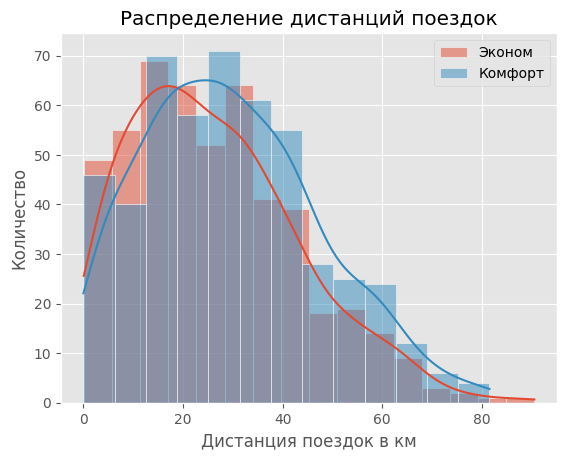

In [ ]:
sns.histplot(df_1['distance_km'], kde=True, label = 'Эконом') #Эконом
sns.histplot(df_2['distance_km'], kde=True, label = 'Комфорт') #Комфорт

plt.xlabel('Дистанция поездок в км') #Добавлено название и подписи осей
plt.ylabel('Количество')
plt.title('Распределение дистанций поездок')

plt.legend()
plt.show()





Смотрим распределение через distplot

<ipython-input-143-ce6a33a59012>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['distance_km'], 50,) #Эконом
<ipython-input-143-ce6a33a59012>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['distance_km'], 50,) #Комфорт


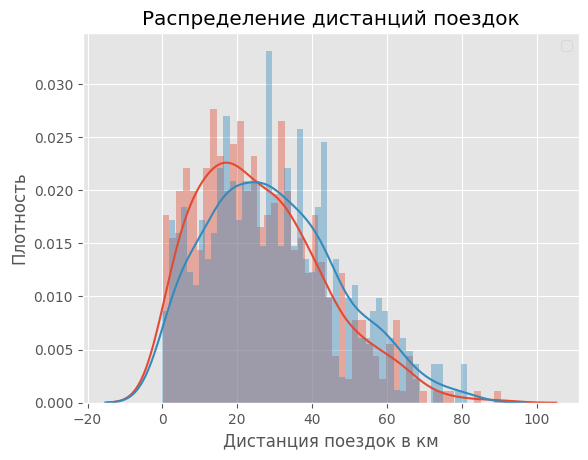

In [ ]:
sns.distplot(df_1['distance_km'], 50,) #Эконом
sns.distplot(df_2['distance_km'], 50,) #Комфорт

plt.xlabel('Дистанция поездок в км') #Добавлено название и подписи осей
plt.ylabel('Плотность')
plt.title('Распределение дистанций поездок')

plt.legend()
plt.show()


Вывод: при изучении графиков мы видим, что распределение стремится к нормальному. Оно представляет собой логонормальное распределение, т.е. близко к нормальному распределению. Это касается обоих графиков распределения, по классам поездки Эконом и Комфорт.

# Проверка гипотезы

H0 = Дистанции поездок не имеют существенных различий для классов поездок Эконом и Комфорт

Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05                          # Уровень значимости

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


Выводы: проверка показывает, что H0 отвергается. Следовательно дистанции поездок имеют существенные статистические различия для классов поездок Эконом и Комфорт